In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import plotly.express as px



In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fifa-world-cup-2022-player-data/player_data_description.json
/kaggle/input/fifa-world-cup-2022-player-data/player_passing.csv
/kaggle/input/fifa-world-cup-2022-player-data/player_stats.csv
/kaggle/input/fifa-world-cup-2022-player-data/player_passing_types.csv
/kaggle/input/fifa-world-cup-2022-player-data/player_possession.csv
/kaggle/input/fifa-world-cup-2022-player-data/player_misc.csv
/kaggle/input/fifa-world-cup-2022-player-data/player_keepers.csv
/kaggle/input/fifa-world-cup-2022-player-data/player_defense.csv
/kaggle/input/fifa-world-cup-2022-player-data/player_keepersadv.csv
/kaggle/input/fifa-world-cup-2022-player-data/player_gca.csv
/kaggle/input/fifa-world-cup-2022-player-data/player_playingtime.csv
/kaggle/input/fifa-world-cup-2022-player-data/player_shooting.csv
/kaggle/input/fifa-world-cup-2022-qatar-match-data/Fifa_WC_2022_Match_data.csv


In [3]:
# Read the CSV file in pandas
fifa_df = pd.read_csv("/kaggle/input/fifa-world-cup-2022-qatar-match-data/Fifa_WC_2022_Match_data.csv", encoding='latin1')
player_stat_df = pd.read_csv("/kaggle/input/fifa-world-cup-2022-player-data/player_stats.csv", encoding='latin1')
gk_stat_df = pd.read_csv("/kaggle/input/fifa-world-cup-2022-player-data/player_keepers.csv", encoding='latin1')
gk_stat_adv_df = pd.read_csv("/kaggle/input/fifa-world-cup-2022-player-data/player_keepersadv.csv", encoding='latin1')

In [4]:
fifa_df.tail()

,match_no,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,1_panelties_scored,2_panelties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied
59,60,Sat,10-Dec-22,20:00,Al Bayt Stadium,Wilton Sampaio,Quarter-final,ENGLAND,FRANCE,68895,...,1,0,9,15,0,0,49,54,193,308
60,61,Tue,13-Dec-22,20:00,Lusail Iconic Stadium,Daniele Orsato,Semi-Final,ARGENTINA,CROATIA,88966,...,1,0,12,10,0,0,85,63,321,260
61,62,Wed,14-Dec-22,20:00,Al Bayt Stadium,Cesar Ramos,Semi-Final,FRANCE,MOROCCO,68294,...,0,0,13,14,0,0,72,47,328,218
62,63,Sat,17-Dec-22,16:00,Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Play-off for third place,CROATIA,MOROCCO,44137,...,0,0,7,14,0,0,75,72,288,277
63,64,Sun,18-Dec-22,16:00,Lusail Iconic Stadium,Szymon Marciniak,Final,ARGENTINA,FRANCE,88966,...,1,2,11,21,0,0,87,104,280,409


In [5]:
fifa_df.info()
# Checking For Null Values 
fifa_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   match_no                         64 non-null     int64  
 1   day_of_week                      64 non-null     object 
 2   date                             64 non-null     object 
 3   hour                             64 non-null     object 
 4   venue                            64 non-null     object 
 5   referee                          64 non-null     object 
 6   group                            64 non-null     object 
 7   1                                64 non-null     object 
 8   2                                64 non-null     object 
 9   attendance                       64 non-null     int64  
 10  1_xg                             64 non-null     float64
 11  2_xg                             64 non-null     float64
 12  1_poss                  

match_no                           0
day_of_week                        0
date                               0
hour                               0
venue                              0
referee                            0
group                              0
1                                  0
2                                  0
attendance                         0
1_xg                               0
2_xg                               0
1_poss                             0
2_poss                             0
1_goals                            0
2_goals                            0
score                              0
1_attempts                         0
2_attempts                         0
1_conceded                         0
2_conceded                         0
1_goal_inside_penalty_area         0
2_goal_inside_penalty_area         0
1_goal_outside_penalty_area        0
2_goal_outside_penalty_area        0
1_ontarget                         0
2_ontarget                         0
1

In [6]:
# add 1_goals and 2_goals, append a new col with name total_goals 
# and store the added value in that
fifa_df['total_match_goals'] = fifa_df['1_goals'] + fifa_df['2_goals']

In [7]:
# Show the specific col  i.e 1_goals and 2_goals and total_goals
fifa_df.loc[:,['1_goals', '2_goals', 'total_match_goals']].head(11)

,1_goals,2_goals,total_match_goals
0,0,2,2
1,6,2,8
2,0,2,2
3,1,1,2
4,1,2,3
5,0,0,0
6,0,0,0
7,4,1,5
8,0,0,0
9,1,2,3


In [8]:
# Highest scoring match
fifa_df[fifa_df['total_match_goals'] == fifa_df['total_match_goals'].max()]

,match_no,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,2_panelties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied,total_match_goals
1,2,Mon,21-Nov-22,14:00,Khalifa International Stadium,Raphael Claus,Group B,ENGLAND,IRAN,45334,...,1,8,13,0,0,63,72,139,416,8


In [9]:
# Match with highest Attendence
fifa_df[fifa_df['attendance'] == fifa_df['attendance'].max()]

,match_no,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,2_panelties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied,total_match_goals
23,24,Sat,26-Nov-22,20:00,Lusail Iconic Stadium,Daniele Orsato,Group C,ARGENTINA,MEXICO,88966,...,0,4,5,0,0,63,79,220,327,2
60,61,Tue,13-Dec-22,20:00,Lusail Iconic Stadium,Daniele Orsato,Semi-Final,ARGENTINA,CROATIA,88966,...,0,12,10,0,0,85,63,321,260,3
63,64,Sun,18-Dec-22,16:00,Lusail Iconic Stadium,Szymon Marciniak,Final,ARGENTINA,FRANCE,88966,...,2,11,21,0,0,87,104,280,409,6


In [10]:
# Argetina matches
fifa_df[(fifa_df['1'] == 'ARGENTINA') | (fifa_df['2'] == 'ARGENTINA')] 

,match_no,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,2_panelties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied,total_match_goals
4,5,Tue,22-Nov-22,11:00,Lusail Iconic Stadium,Slavko Vincic,Group C,ARGENTINA,SAUDI ARABIA,88012,...,0,4,14,0,0,65,80,163,361,3
23,24,Sat,26-Nov-22,20:00,Lusail Iconic Stadium,Daniele Orsato,Group C,ARGENTINA,MEXICO,88966,...,0,4,5,0,0,63,79,220,327,2
38,39,Wed,30-Nov-22,20:00,Lusail Iconic Stadium,Michael Oliver,Group C,POLAND,ARGENTINA,84985,...,0,25,4,0,0,67,48,438,141,2
49,50,Sat,3-Dec-22,20:00,Ahmed bin Ali Stadium,Szymon Marciniak,Round of 16,ARGENTINA,AUSTRALIA,45032,...,0,5,14,1,0,67,73,240,453,3
57,58,Fri,9-Dec-22,20:00,Lusail Iconic Stadium,Antonio Mateu Lahoz,Quarter-final,NETHERLANDS,ARGENTINA,88235,...,1,15,5,0,0,91,79,401,323,4
60,61,Tue,13-Dec-22,20:00,Lusail Iconic Stadium,Daniele Orsato,Semi-Final,ARGENTINA,CROATIA,88966,...,0,12,10,0,0,85,63,321,260,3
63,64,Sun,18-Dec-22,16:00,Lusail Iconic Stadium,Szymon Marciniak,Final,ARGENTINA,FRANCE,88966,...,2,11,21,0,0,87,104,280,409,6


In [11]:
# Argetina matches
fifa_df[(fifa_df['1'] == 'FRANCE') | (fifa_df['2'] == 'FRANCE')] 

,match_no,day_of_week,date,hour,venue,referee,group,1,2,attendance,...,2_panelties_scored,1_goal_prevented,2_goal_prevented,1_own_goal,2_own_goal,1_forced_turnovers,2_forced_turnovers,1_defensive_pressure_applied,2_defensive_pressure_applied,total_match_goals
7,8,Tue,22-Nov-22,20:00,Al Janoub Stadium,Victor Gomes,Group D,FRANCE,AUSTRALIA,40875,...,0,4,22,0,0,64,56,250,316,5
22,23,Sat,26-Nov-22,17:00,Stadium 974,Szymon Marciniak,Group D,FRANCE,DENMARK,42860,...,0,10,21,0,0,79,61,269,282,3
37,38,Wed,30-Nov-22,16:00,Education City Stadium,Matt Conger,Group D,TUNISIA,FRANCE,43627,...,0,11,6,0,0,68,80,400,202,1
50,51,Sun,4-Dec-22,16:00,Al Thumama Stadium,Jesús Valenzuela Sáez,Round of 16,FRANCE,POLAND,40989,...,1,11,16,0,0,71,64,220,297,4
59,60,Sat,10-Dec-22,20:00,Al Bayt Stadium,Wilton Sampaio,Quarter-final,ENGLAND,FRANCE,68895,...,0,9,15,0,0,49,54,193,308,3
61,62,Wed,14-Dec-22,20:00,Al Bayt Stadium,Cesar Ramos,Semi-Final,FRANCE,MOROCCO,68294,...,0,13,14,0,0,72,47,328,218,2
63,64,Sun,18-Dec-22,16:00,Lusail Iconic Stadium,Szymon Marciniak,Final,ARGENTINA,FRANCE,88966,...,2,11,21,0,0,87,104,280,409,6


In [12]:
# No. Matches Played on respective venues till QF
fifa_df['venue'].value_counts()

Lusail Iconic Stadium            10
Al Bayt Stadium                   9
Khalifa International Stadium     8
Al Thumama Stadium                8
Education City Stadium            8
Ahmed bin Ali Stadium             7
Stadium 974                       7
Al Janoub Stadium                 7
Name: venue, dtype: int64

In [13]:
# Bar graph Venue v/s No of Matches Played at Venue (using plotly)
x = fifa_df['venue'].value_counts().index
y = fifa_df['venue'].value_counts().values

df = pd.DataFrame({'Venue':x,
                  'Matches':fifa_df['venue'].value_counts().values })

fig = px.bar(df, 
             x='Venue', 
             y='Matches',
             color='Venue',
             title='Venue v/s No of Matches Played at Venue'
            )
fig.show()

In [14]:
# Total Attendance in all the venue of all matches played till QF
fifa_df.groupby('venue').sum()['attendance'].sort_values(ascending=False)

venue
Lusail Iconic Stadium            874607
Al Bayt Stadium                  601149
Khalifa International Stadium    355552
Education City Stadium           349114
Al Thumama Stadium               337685
Ahmed bin Ali Stadium            299517
Stadium 974                      297854
Al Janoub Stadium                288774
Name: attendance, dtype: int64

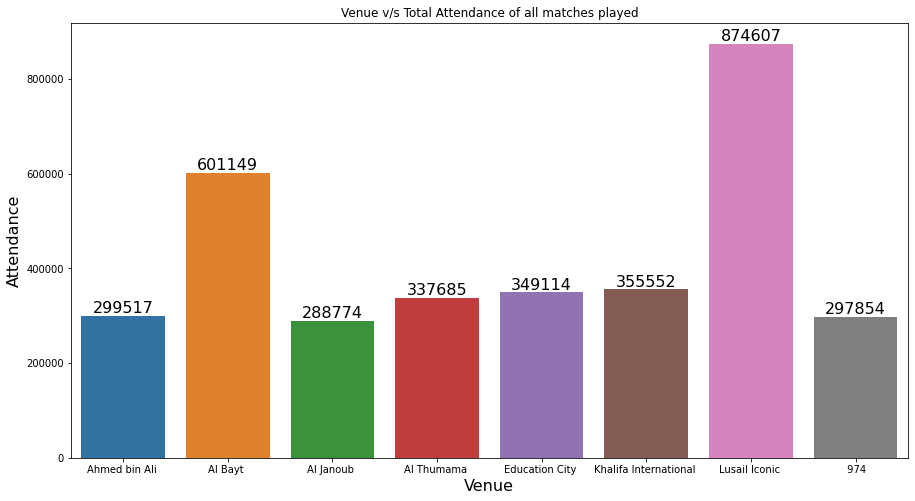

In [15]:
# Bar graph Venue v/s attendance at Venue (using seaborn) 
x = fifa_df.groupby('venue').sum()['attendance'].index
y = fifa_df.groupby('venue').sum()['attendance'].values
labels = [s.strip('Stadium') for s in x]
df = pd.DataFrame({'venue': labels, 'attendance': y})
plt.figure(figsize=(15, 8))
splot=sns.barplot(x="venue",y="attendance",data=df)
plt.xlabel("Venue", size=16)
plt.ylabel("Attendance", size=16)
plt.title('Venue v/s Total Attendance of all matches played')
plt.bar_label(splot.containers[0],size=16)
plt.show()

In [16]:
# Bar graph venue v/s attendance at Venue (using plotly)
x = fifa_df.groupby('venue').sum()['attendance'].sort_index().index
y = fifa_df.groupby('venue').sum()['attendance'].sort_index().values

df_1 = pd.DataFrame({'venue': x, 'attendance': y})

fig = px.bar(df_1, x='venue', y='attendance',color='attendance',title='Venue v/s Total Attendance of all matches played')
fig.update_layout(title_text='Venue v/s Total Attendance of all matches played',template='plotly_dark')
fig.show()

In [17]:
# Venue with max attendance of total matches played 
venue_df = pd.DataFrame({'venue':fifa_df.groupby(['venue'])['attendance'].sum().sort_values(ascending=False).index,
                   'total_attendance': fifa_df.groupby(['venue'])['attendance'].sum().sort_values(ascending=False).values})
venue_df[venue_df['total_attendance'] == venue_df['total_attendance'].max()]



,venue,total_attendance
0,Lusail Iconic Stadium,874607


In [18]:
# Total games played and goals scored by the teams

team_df = pd.DataFrame({'teams':fifa_df['1'].value_counts().sort_index().index,
                        'total_matches':fifa_df['1'].value_counts().sort_index().values + fifa_df['2'].value_counts().sort_index().values,
                        'total_goals': fifa_df.groupby(['1'])['1_goals'].sum().sort_index().values + fifa_df.groupby(['2'])['2_goals'].sum().sort_index().values, 
                         })
team_df.sort_values(by='total_goals', ascending=False)


#team_df.loc[:, ['teams','total_matches','total_goals' ]].sort_values(by='total_goals', ascending=False)




,teams,total_matches,total_goals
11,FRANCE,7,16
0,ARGENTINA,7,15
10,ENGLAND,5,13
21,PORTUGAL,5,12
19,NETHERLANDS,5,10
26,SPAIN,4,9
3,BRAZIL,5,8
7,CROATIA,7,8
12,GERMANY,3,6
18,MOROCCO,7,6


In [19]:
# Bar graph Team v/s Goals Scored (using plotly)

fig = px.bar(team_df, x='teams', y='total_goals',color='total_matches',title='Teams v/s Goals Scored')
fig.update_layout(title_text='Teams v/s Goals Scored',template='plotly_white')
fig.show()

In [20]:
# Highest Goals Scoring Team
team_df[team_df['total_goals'] == team_df['total_goals'].max()]

,teams,total_matches,total_goals
11,FRANCE,7,16


In [21]:
# Top 3 highest Goal Scoring Teams
team_df.sort_values(by='total_goals', ascending=False).head(3)

,teams,total_matches,total_goals
11,FRANCE,7,16
0,ARGENTINA,7,15
10,ENGLAND,5,13


In [22]:
#lowest Goal Scoring Teams
team_df[team_df['total_goals'] == team_df['total_goals'].min()]

,teams,total_matches,total_goals
2,BELGIUM,3,1
8,DENMARK,3,1
22,QATAR,3,1
28,TUNISIA,3,1
31,WALES,3,1


In [23]:
# no of matches played and passes completed by teams

team_df['total_pass_completed'] = fifa_df.groupby(['1'])['1_passes_compeletd'].sum().sort_index().values + fifa_df.groupby(['2'])['2_passes_compeletd'].sum().sort_index().values

#sort on total_pass_completed
team_df.loc[:,['teams', 'total_matches', 'total_pass_completed']].sort_values(by='total_pass_completed', ascending=False)




,teams,total_matches,total_pass_completed
0,ARGENTINA,7,3841
7,CROATIA,7,3724
26,SPAIN,4,3527
11,FRANCE,7,3192
10,ENGLAND,5,2723
3,BRAZIL,5,2696
21,PORTUGAL,5,2615
19,NETHERLANDS,5,2442
18,MOROCCO,7,2219
29,UNITED STATES,4,1777


In [24]:
# Bar graph Team v/s pass completed (method 1 using plotly)

fig = px.bar(team_df, x='teams', y='total_pass_completed',color='total_matches',title='Teams v/s Pass Completed')
fig.update_layout(title_text='Teams v/s Pass Completed',template='plotly')
fig.show()

In [25]:
# Highest no of passes completed by team
team_df.loc[team_df['total_pass_completed'] == team_df['total_pass_completed'].max(), ['teams', 'total_matches', 'total_pass_completed']]

,teams,total_matches,total_pass_completed
0,ARGENTINA,7,3841


In [26]:
# Top 3 teams w.r.t. the no of passes completed 
team_df.loc[:, ['teams', 'total_matches', 'total_pass_completed']].sort_values(by='total_pass_completed', ascending=False).head(3)

,teams,total_matches,total_pass_completed
0,ARGENTINA,7,3841
7,CROATIA,7,3724
26,SPAIN,4,3527


In [27]:
# Lowest no of passes completed by team
team_df.loc[team_df['total_pass_completed'] == team_df['total_pass_completed'].min(), ['teams', 'total_matches', 'total_pass_completed']]

,teams,total_matches,total_pass_completed
14,IRAN,3,735


In [28]:
# no of matches played and possession by teams

team_df['avg_possession'] = round((fifa_df.groupby(['1'])['1_poss'].sum().sort_index().values + fifa_df.groupby(['2'])['2_poss'].sum().sort_index().values)/team_df['total_matches'], 2)

#sort on avg_possession
team_df.loc[:, ['teams', 'total_matches', 'avg_possession']].sort_values(by='avg_possession', ascending=False)

,teams,total_matches,avg_possession
26,SPAIN,4,75.75
10,ENGLAND,5,62.80
21,PORTUGAL,5,60.40
8,DENMARK,3,60.00
12,GERMANY,3,59.33
17,MEXICO,3,58.33
3,BRAZIL,5,56.20
0,ARGENTINA,7,55.57
7,CROATIA,7,55.57
2,BELGIUM,3,54.00


In [29]:
# Bar graph Teams v/s Avg Possession 

fig = px.bar(team_df, x='teams', y='avg_possession',color='total_matches',title='Teams v/s Avg Possession')
fig.update_layout(title_text='Teams v/s Avg Possession ',template='ggplot2')
fig.show()

In [30]:
# Highest avg_possession by team
team_df.loc[team_df['avg_possession'] == team_df['avg_possession'].max(), ['teams', 'total_matches', 'avg_possession']]

,teams,total_matches,avg_possession
26,SPAIN,4,75.75


In [31]:
# Top 3 teams w.r.t. the avg_possession
team_df.loc[:,['teams', 'total_matches', 'avg_possession']].sort_values(by='avg_possession', ascending=False).head(3)

,teams,total_matches,avg_possession
26,SPAIN,4,75.75
10,ENGLAND,5,62.80
21,PORTUGAL,5,60.40


In [32]:
# Lowest avg_possession by team
team_df.loc[team_df['avg_possession'] == team_df['avg_possession'].min(), ['teams', 'total_matches', 'avg_possession']]

,teams,total_matches,avg_possession
6,COSTA RICA,3,31.33


In [33]:
# Exected Goals(xG) by teams

team_df['avg_xg'] = round((fifa_df.groupby(['1'])['1_xg'].sum().sort_index().values + fifa_df.groupby(['2'])['2_xg'].sum().sort_index().values)/team_df['total_matches'], 2)

#sort on avg_xg
team_df.loc[:,['teams', 'total_matches', 'avg_xg']].sort_values(by='avg_xg', ascending=False)

,teams,total_matches,avg_xg
12,GERMANY,3,3.37
3,BRAZIL,5,2.40
0,ARGENTINA,7,1.99
11,FRANCE,7,1.94
10,ENGLAND,5,1.74
21,PORTUGAL,5,1.56
26,SPAIN,4,1.52
17,MEXICO,3,1.50
9,ECUADOR,3,1.50
27,SWITZERLAND,4,1.40


In [34]:
# Bar graph Teams v/s Exected Goals(xG) 

fig = px.bar(team_df, x='teams', y='avg_xg',color='total_matches',title='Teams v/s Exected Goals(xG) ')
fig.update_layout(title_text='Teams v/s Exected Goals(xG)  ',template='seaborn')
fig.show()

In [35]:
# Highest Exected Goals(xG) by teams
team_df.loc[team_df['avg_xg'] == team_df['avg_xg'].max(), ['teams', 'total_matches', 'avg_xg']]

,teams,total_matches,avg_xg
12,GERMANY,3,3.37


In [36]:
# Top 3 teams w.r.t. the Exected Goals(xG)
team_df.loc[:,['teams', 'total_matches', 'avg_xg']].sort_values(by='avg_xg', ascending=False).head(3)

,teams,total_matches,avg_xg
12,GERMANY,3,3.37
3,BRAZIL,5,2.40
0,ARGENTINA,7,1.99


In [37]:
# Lowest Exected Goals(xG) by team
team_df.loc[team_df['avg_xg'] == team_df['avg_xg'].min(), ['teams', 'total_matches', 'avg_xg']]

,teams,total_matches,avg_xg
6,COSTA RICA,3,0.47


In [38]:
# This is how team_df looks like after the above iterations 
# sorted in alphabetical order
team_df.head(32)

,teams,total_matches,total_goals,total_pass_completed,avg_possession,avg_xg
0,ARGENTINA,7,15,3841,55.57,1.99
1,AUSTRALIA,4,4,1206,37.75,0.57
2,BELGIUM,3,1,1568,54.00,0.77
3,BRAZIL,5,8,2696,56.20,2.40
4,CAMEROON,3,4,934,41.67,1.13
5,CANADA,3,2,1288,49.00,1.17
6,COSTA RICA,3,3,810,31.33,0.47
7,CROATIA,7,8,3724,55.57,1.10
8,DENMARK,3,1,1563,60.00,0.87
9,ECUADOR,3,4,1107,54.00,1.50


In [39]:
# Yellow Cards by teams 

team_df['total_yellow_cards'] = (fifa_df.groupby(['1'])['1_yellow_cards'].sum().sort_index().values + fifa_df.groupby(['2'])['2_yellow_cards'].sum().sort_index().values)

#sort on total_yellow_cards
team_df.loc[:, ['teams', 'total_matches', 'total_yellow_cards']].sort_values(by='total_yellow_cards', ascending=False)

,teams,total_matches,total_yellow_cards
0,ARGENTINA,7,16
23,SAUDI ARABIA,3,14
25,SERBIA,3,12
18,MOROCCO,7,9
27,SWITZERLAND,4,9
4,CAMEROON,3,8
5,CANADA,3,8
7,CROATIA,7,8
19,NETHERLANDS,5,8
11,FRANCE,7,8


In [40]:
# Bar graph Teams v/s Yellow Cards

fig = px.bar(team_df, x='teams', y='total_yellow_cards',color='total_matches',title='Teams v/s Yellow Cards ')
fig.update_layout(title_text='Teams v/s Yellow Cards  ',template='simple_white')
fig.show()

In [41]:
# Highest Yellow Cards by teams
team_df.loc[team_df['total_yellow_cards'] == team_df['total_yellow_cards'].max(), ['teams', 'total_matches', 'total_yellow_cards']]

,teams,total_matches,total_yellow_cards
0,ARGENTINA,7,16


In [42]:
# Top 3 teams w.r.t. the Yellow Cards
team_df.loc[:,['teams', 'total_matches', 'total_yellow_cards']].sort_values(by='total_yellow_cards', ascending=False).head(3)

,teams,total_matches,total_yellow_cards
0,ARGENTINA,7,16
23,SAUDI ARABIA,3,14
25,SERBIA,3,12


In [43]:
# Lowest Yellow Cards by teams
team_df.loc[team_df['total_yellow_cards'] == team_df['total_yellow_cards'].min(), ['teams', 'total_matches', 'total_yellow_cards']]

,teams,total_matches,total_yellow_cards
10,ENGLAND,5,1


In [44]:
# Teams with Red Cards

team_df['total_red_cards'] = (fifa_df.groupby(['1'])['1_red_cards'].sum().sort_index().values + fifa_df.groupby(['2'])['2_red_cards'].sum().sort_index().values)
team_df.loc[team_df['total_red_cards'] != 0, ['teams', 'total_matches', 'total_red_cards']].sort_values(by='total_red_cards', ascending=False)

,teams,total_matches,total_red_cards
4,CAMEROON,3,1
18,MOROCCO,7,1
31,WALES,3,1


In [45]:
# Total games played and goals conceded by the teams  

team_df['total_goals_conceded'] = (fifa_df.groupby(['1'])['1_conceded'].sum().sort_index().values + fifa_df.groupby(['2'])['2_conceded'].sum().sort_index().values)

#sort on goals conceded
team_df.loc[:, ['teams', 'total_matches', 'total_goals_conceded']].sort_values(by='total_goals_conceded', ascending=False)


,teams,total_matches,total_goals_conceded
6,COSTA RICA,3,11
27,SWITZERLAND,4,9
0,ARGENTINA,7,8
25,SERBIA,3,8
11,FRANCE,7,8
16,KOREA REPUBLIC,4,8
5,CANADA,3,7
14,IRAN,3,7
24,SENEGAL,4,7
22,QATAR,3,7


In [46]:
# Bar graph Teams v/s Total Goals Conceded

fig = px.bar(team_df, x='teams', y='total_goals_conceded',color='total_matches',title='Teams v/s Total Goals Conceded ')
fig.update_layout(title_text='Teams v/s Total Goals Conceded  ',template='none')
fig.show()

In [47]:
# Team with Highest Goal Conceded
team_df.loc[team_df['total_goals_conceded'] == team_df['total_goals_conceded'].max(), ['teams', 'total_matches', 'total_goals_conceded']]

,teams,total_matches,total_goals_conceded
6,COSTA RICA,3,11


In [48]:
# Team with Lowest Goal Conceded
team_df.loc[team_df['total_goals_conceded'] == team_df['total_goals_conceded'].min(), ['teams', 'total_matches', 'total_goals_conceded']]

,teams,total_matches,total_goals_conceded
28,TUNISIA,3,1


In [49]:
# Top 3 teams w.r.t. the Goal Conceded
team_df.loc[:,['teams', 'total_matches', 'total_goals_conceded']].sort_values(by='total_goals_conceded', ascending=False).head(3)

,teams,total_matches,total_goals_conceded
6,COSTA RICA,3,11
27,SWITZERLAND,4,9
0,ARGENTINA,7,8


In [50]:
# Teams with own goals  

team_df['total_own_goals'] = (fifa_df.groupby(['1'])['1_own_goal'].sum().sort_index().values + fifa_df.groupby(['2'])['2_own_goal'].sum().sort_index().values)

#sort on total_own_goals
team_df.loc[team_df['total_own_goals'] != 0, ['teams', 'total_matches', 'total_own_goals']].sort_values(by='total_own_goals', ascending=False)


,teams,total_matches,total_own_goals
0,ARGENTINA,7,1
18,MOROCCO,7,1


In [51]:
# Total games played and goals conceded by the teams excluding own goals  

team_df['goals_by_opponent'] = team_df['total_goals_conceded'] - team_df['total_own_goals']

#sort on goals_by_opponent
team_df.loc[:, ['teams','total_matches','total_goals_conceded','total_own_goals', 'goals_by_opponent']].sort_values(by='goals_by_opponent', ascending=False)


,teams,total_matches,total_goals_conceded,total_own_goals,goals_by_opponent
6,COSTA RICA,3,11,0,11
27,SWITZERLAND,4,9,0,9
16,KOREA REPUBLIC,4,8,0,8
11,FRANCE,7,8,0,8
25,SERBIA,3,8,0,8
24,SENEGAL,4,7,0,7
22,QATAR,3,7,0,7
14,IRAN,3,7,0,7
13,GHANA,3,7,0,7
0,ARGENTINA,7,8,1,7


In [52]:
# Bar graph Teams v/s Total Goals Conceded(excluding Own Goal)

fig = px.bar(team_df, x='teams', y='goals_by_opponent',color='total_matches',title='Teams v/s Total Goals Conceded(excluding Own Goal) ')
fig.update_layout(title_text='Teams v/s Total Goals Conceded(excluding Own Goal)  ',template='plotly_white')
fig.show()

# **Player Statistics**

In [53]:
player_stat_df.head()

,player,position,team,age,club,birth_year,games,games_starts,minutes,minutes_90s,...,goals_assists_pens_per90,xg,npxg,xg_assist,npxg_xg_assist,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
0,Aaron Mooy,MF,Australia,32-094,Celtic,1990,4,4,360,4.0,...,0.0,0.0,0.0,0.1,0.1,0.01,0.02,0.03,0.01,0.03
1,Aaron Ramsey,MF,Wales,31-357,Nice,1990,3,3,266,3.0,...,0.0,0.0,0.0,0.0,0.1,0.01,0.01,0.02,0.01,0.02
2,Abdelhamid Sabiri,MF,Morocco,26-020,Sampdoria,1996,5,2,181,2.0,...,0.5,0.1,0.1,0.9,1.0,0.08,0.53,0.60,0.08,0.60
3,Abdelkarim Hassan,DF,Qatar,29-112,Al Sadd SC,1993,3,3,270,3.0,...,0.0,0.3,0.3,0.0,0.3,0.10,0.01,0.11,0.10,0.11
4,Abderrazak Hamdallah,FW,Morocco,32-001,Al-Ittihad,1990,4,0,68,0.8,...,0.0,0.4,0.4,0.0,0.4,0.52,0.00,0.52,0.52,0.52


In [54]:
player_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player                    680 non-null    object 
 1   position                  680 non-null    object 
 2   team                      680 non-null    object 
 3   age                       680 non-null    object 
 4   club                      679 non-null    object 
 5   birth_year                680 non-null    int64  
 6   games                     680 non-null    int64  
 7   games_starts              680 non-null    int64  
 8   minutes                   680 non-null    int64  
 9   minutes_90s               680 non-null    float64
 10  goals                     680 non-null    int64  
 11  assists                   680 non-null    int64  
 12  goals_pens                680 non-null    int64  
 13  pens_made                 680 non-null    int64  
 14  pens_att  

In [55]:
# Top Goal Scorer of WC 2022 | Golden Boot Award
#player_stat_df[player_stat_df['goals'] == player_stat_df['goals'].max()]
player_stat_df.loc[player_stat_df['goals'] == player_stat_df['goals'].max(), ['player', 'team','birth_year', 'club','games', 'assists','goals' ] ]

,player,team,birth_year,club,games,assists,goals
377,Kylian MbappÃ©,France,1998,Paris S-G,7,2,8


In [56]:
# Top 5 Goal Scorer of WC 2022
player_stat_df.loc[:, ['player', 'team','birth_year', 'club','games', 'assists','goals' ] ].sort_values(by='goals', ascending=False).head(5)

,player,team,birth_year,club,games,assists,goals
377,Kylian MbappÃ©,France,1998,Paris S-G,7,2,8
388,Lionel Messi,Argentina,1987,Paris S-G,7,3,7
330,JuliÃ¡n Ãlvarez,Argentina,2000,Manchester City,7,0,4
502,Olivier Giroud,France,1986,Milan,6,0,4
672,Ãlvaro Morata,Spain,1992,AtlÃ©tico Madrid,4,1,3


In [57]:

player_stat_df[player_stat_df['xg'] == player_stat_df['xg'].max()]

,player,position,team,age,club,birth_year,games,games_starts,minutes,minutes_90s,...,goals_assists_pens_per90,xg,npxg,xg_assist,npxg_xg_assist,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
388,Lionel Messi,FW,Argentina,35-177,Paris S-G,1987,7,7,690,7.7,...,0.78,6.6,2.6,2.5,5.1,0.94,0.36,1.3,0.38,0.74


In [58]:
# Top Goal Assist of WC 2022 
player_stat_df.loc[player_stat_df['assists'] == player_stat_df['assists'].max(), ['player', 'team','birth_year', 'club','games', 'assists','goals' ] ].sort_values(by='goals', ascending=False)

,player,team,birth_year,club,games,assists,goals
388,Lionel Messi,Argentina,1987,Paris S-G,7,3,7
103,Bruno Fernandes,Portugal,1994,Manchester Utd,4,3,2
240,Harry Kane,England,1993,Tottenham,5,3,2
273,Ivan PeriÅ¡iÄ,Croatia,1989,Tottenham,7,3,1
63,Antoine Griezmann,France,1991,AtlÃ©tico Madrid,7,3,0


In [59]:
gk_stat_df.head()

,player,position,team,age,club,birth_year,gk_games,gk_games_starts,gk_minutes,minutes_90s,...,gk_wins,gk_ties,gk_losses,gk_clean_sheets,gk_clean_sheets_pct,gk_pens_att,gk_pens_allowed,gk_pens_saved,gk_pens_missed,gk_pens_save_pct
0,Aimen Dahmen,GK,Tunisia,25-324,CS Sfaxien,1997,3,3,270,3.0,...,1,1,1,2,66.7,0,0,0,0,NaN
1,Alireza Beiranvand,GK,IR Iran,30-088,Persepolis,1992,2,2,109,1.2,...,0,0,1,0,0.0,0,0,0,0,NaN
2,Alisson,GK,Brazil,30-077,Liverpool,1992,4,4,379,4.2,...,2,1,0,2,50.0,0,0,0,0,NaN
3,Andries Noppert,GK,Netherlands,28-255,Heerenveen,1994,5,5,480,5.3,...,3,2,0,2,40.0,1,1,0,0,0.0
4,AndrÃ© Onana,GK,Cameroon,26-260,Inter,1996,1,1,80,0.9,...,0,0,1,0,0.0,0,0,0,0,NaN


In [60]:
gk_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   player                      41 non-null     object 
 1   position                    41 non-null     object 
 2   team                        41 non-null     object 
 3   age                         41 non-null     object 
 4   club                        41 non-null     object 
 5   birth_year                  41 non-null     int64  
 6   gk_games                    41 non-null     int64  
 7   gk_games_starts             41 non-null     int64  
 8   gk_minutes                  41 non-null     int64  
 9   minutes_90s                 41 non-null     float64
 10  gk_goals_against            41 non-null     int64  
 11  gk_goals_against_per90      41 non-null     float64
 12  gk_shots_on_target_against  41 non-null     int64  
 13  gk_saves                    41 non-nu

In [61]:
# gk_stat_df['gk_save_pct'] == gk_stat_df['gk_save_pct'].max()
gk_stat_df.loc[:, ['player', 'team', 'birth_year', 'club','gk_games', 'gk_goals_against','gk_saves', 'gk_save_pct', 'gk_wins','gk_ties','gk_losses','gk_clean_sheets','gk_clean_sheets_pct' ]].sort_values(by=['gk_save_pct', 'gk_clean_sheets_pct'], ascending=False).head(5)

,player,team,birth_year,club,gk_games,gk_goals_against,gk_saves,gk_save_pct,gk_wins,gk_ties,gk_losses,gk_clean_sheets,gk_clean_sheets_pct
28,Munir,Morocco,1989,Al-Wehda,1,0,3,100.0,1,0,0,1,100.0
0,Aimen Dahmen,Tunisia,1997,CS Sfaxien,3,1,9,90.0,1,1,1,2,66.7
3,Andries Noppert,Netherlands,1994,Heerenveen,5,4,18,86.4,3,2,0,2,40.0
30,Sergio Rochet,Uruguay,1993,Nacional,3,2,4,85.7,1,1,1,2,66.7
31,ShÅ«ichi Gonda,Japan,1989,S-Pulse,4,4,15,84.2,2,1,1,0,0.0


In [62]:
gk_stat_adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   player                                 41 non-null     object 
 1   position                               41 non-null     object 
 2   team                                   41 non-null     object 
 3   age                                    41 non-null     object 
 4   birth_year                             41 non-null     int64  
 5   minutes_90s                            41 non-null     float64
 6   gk_goals_against                       41 non-null     int64  
 7   gk_pens_allowed                        41 non-null     int64  
 8   gk_free_kick_goals_against             41 non-null     int64  
 9   gk_corner_kick_goals_against           41 non-null     int64  
 10  gk_own_goals_against                   41 non-null     int64  
 11  gk_psxg 

In [63]:
#gk_psxg
#gk_stat_adv_df[gk_stat_adv_df['gk_psxg'] == gk_stat_adv_df['gk_psxg'].max()]
gk_stat_adv_df.loc[(gk_stat_adv_df['team'] == 'Argentina') |(gk_stat_adv_df['team'] == 'France') ,['player','team','gk_psxg_net']].sort_values(by='gk_psxg_net', ascending=False).head(5)

,player,team,gk_psxg_net
16,Hugo Lloris,France,1.7
32,Steve Mandanda,France,-0.4
11,Emiliano MartÃ­nez,Argentina,-1.6


In [64]:
from pandas_profiling import ProfileReport


In [65]:
profile = ProfileReport(team_df)

In [66]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [67]:
profile.to_file(output_file='fifa.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]